3. A Shor Thing
0 points
Welcome to the QHack 2023 daily challenges! Every day for the next four days, you will receive two new challenges to complete. These challenges are worth no points — they are specifically designed to get your brain active and into the right mindset for the competition. You will also learn about various aspects of PennyLane that are essential to quantum computing, quantum machine learning, and quantum chemistry. Have fun!

Tutorial #3 — Shor's 9-qubit-code
Quantum computational advantage — the ability of quantum computers to perform certain tasks faster than the best classical computers — has now been demonstrated in a number of cases. Arguably, the next big milestone in quantum computing is fault-tolerance for large-scale devices, allowing them to correct errors that crop up as a result of noisy interactions with the environment or between parts of the computer.

The early years of quantum error correction yielded several ground-breaking protocols, none more famous than Peter Shor's 9-qubit-code, pictured below.
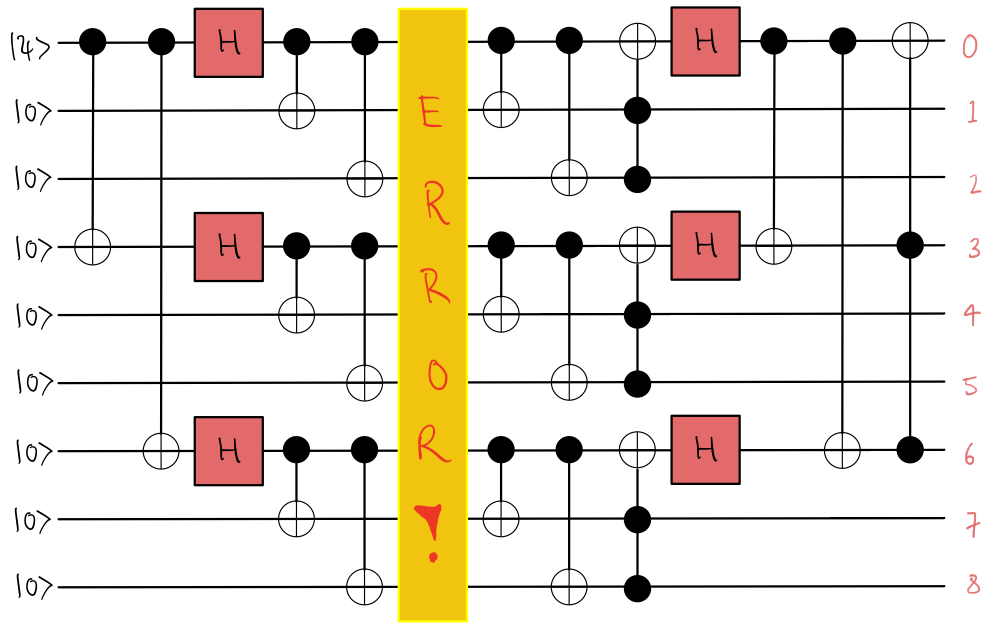

In this challenge, you will implement Shor's code for an arbitrary initial state  that is subject to an error.

**Challenge code**
In the code below, you are given a couple functions:

shor: a QNode that contains the operations required to define Shor's code given an initial state and an error occuring in the middle of the circuit. It must output the expectation value of the Pauli Z operator on each qubit. You must complete this function.
error: this function contains the error operator that will be introduced into the circuit you create with shor. The possible errors are Pauli X, Y, and Z errors (see error_dict). To call this within shor, simply write error(error_key, qubit) and it will apply the error!
Here are some helpful resources:

[Shor code](https://en.wikipedia.org/wiki/Quantum_error_correction#Shor_code)
[Quantum error correction](https://en.wikipedia.org/wiki/Quantum_error_correction)
**Input**
As input to this problem, you are given:

state (list(float)): defines the initial one-qubit state . The remaining 8 qubits are initialized in the  state.
error_key (int): an integer corresponding to a Pauli X, Y, or Z error. See error_dict.
qubit (int): an integer corresponding to which qubit the error will occur on.
**Output**
This code must output a list(float) corresponding to the expectation values of the Pauli Z operator on every qubit.

If your solution matches the correct one within the given tolerance specified in check (in this case it's a 1e-4 relative error tolerance), the output will be "Correct!" Otherwise, you will receive a "Wrong answer" prompt.

Good luck!

**Code**

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

In [ ]:
n_qubits = 9
dev = qml.device("default.qubit", wires=n_qubits)
error_dict = {0: 'PauliX', 1: 'PauliY', 2: 'PauliZ'}

def error(error_key, qubit):
    """Defines the error that is induced in the circuit.

    Args:
        error_key (int): An integer associated to the type of error (Pauli X, Y, or Z)
        qubit (int): The qubit that the error occurs on.
    """
    getattr(qml, error_dict[error_key])(qubit)

@qml.qnode(dev)
def shor(state, error_key, qubit):
    """A circuit defining Shor's code for error correction.

    Args:
        state (list(float)): The quantum state of the first qubit in the circuit.
        error_key (int): An integer associated to the type of error (Pauli X, Y, or Z)
        qubit (int): The qubit that the error occurs on.

    Returns:
        (list(float)): The expectation value of the Pauli Z operator on every qubit.
    """
    qml.QubitStateVector(np.array(state), wires=0)

In [ ]:
    # Put your code here #

In [ ]:
# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    state, error_key, qubit = json.loads(test_case_input)
    output = shor(state, error_key, qubit).tolist()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-4)

In [ ]:
test_cases = [['[[0, 1], 0, 3]', '[-1.0,  1.0,  1.0,  1.0, -1.0, -1.0,  1.0,  1.0,  1.0]']]

In [ ]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")